# Harry Potter Data Analysis




In [4]:
#!pip install numpy pandas matplotlib seaborn
!pip install tensorflow


# Step 1: Data Loading and Cleaning

The following code loads various Harry Potter-related datasets from CSV files. These datasets contain information about characters, dialogues, potions, and spells. After loading, the code standardizes column names, handles missing values, and cleans text data.

# Importing Libraries

In [5]:
# Core Libraries
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis
import json  # For handling JSON data
from collections import defaultdict, Counter  # For handling grouped data and counting elements

# Visualization Libraries
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For high-level statistical graphics

# NLP Libraries (Natural Language Processing)
import re  # For regular expression operations (text cleaning)
import nltk  # For working with human language data
from nltk.corpus import stopwords, wordnet  # Stopwords for filtering, wordnet for lemmatization
from nltk.tokenize import word_tokenize  # For splitting text into tokens (words)
from nltk import pos_tag  # For Part-of-Speech tagging
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.metrics.pairwise import cosine_similarity  # For calculating pairwise cosine similarity between vectors
import math  # For mathematical functions like log
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text data into TF-IDF features
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text classification
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.pipeline import Pipeline  # For creating ML pipelines
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation metrics
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels

# Imbalanced Data Handling Libraries
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline supporting imbalanced data
from imblearn.over_sampling import SMOTE  # For over-sampling minority class
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling majority class

# Deep Learning Libraries
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to equal length
from tensorflow.keras.models import Sequential  # For building sequential models
from tensorflow.keras.layers import Embedding, LSTM, Dense  # For creating deep learning layers
from tensorflow.keras.utils import to_categorical  # For converting labels to categorical format



#  Loading datasets with specific delimiters and encodings

If you are working in Colab, as we did, it is necessary to upload the data to it. So in the end, we upload corpuses for all three movies, potions and spells.


In [6]:
# Loading datasets with specific delimiters and encodings
# Each file contains Harry Potter-related data (dialogues, potions, spells, etc.)
# 'latin1' for correctly loading text
df1 = pd.read_csv('/content/Harry_Potter/Harry Potter 1.csv', delimiter=';', encoding='latin1')
df2 = pd.read_csv('/content/Harry_Potter/Harry Potter 2.csv', delimiter=';', encoding='latin1')
df3 = pd.read_csv('/content/Harry_Potter/Harry Potter 3.csv', delimiter=';', encoding='latin1')
df4 = pd.read_csv('/content/Harry_Potter/Potions.csv', delimiter=';', encoding='latin1')
df5 = pd.read_csv('/content/Harry_Potter/Spells.csv', delimiter=';', encoding='latin1')

In [7]:
# See the colnames
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)


Index(['ï»¿Character', 'Sentence'], dtype='object')
Index(['ï»¿Character', 'Sentence'], dtype='object')
Index(['ï»¿CHARACTER', 'SENTENCE'], dtype='object')
Index(['ï»¿Name', 'Known ingredients', 'Effect', 'Characteristics',
       'Difficulty level,,,,,,,,'],
      dtype='object')
Index(['ï»¿Name', 'Incantation', 'Type', 'Effect', 'Light'], dtype='object')


# Renaming specific columns for consistent naming across datasets


In [8]:
# Removing encoding issues (e.g., ï»¿Character)
df1.rename(columns={'ï»¿Character': 'CHARACTER'}, inplace=True)
df2.rename(columns={'ï»¿Character': 'CHARACTER'}, inplace=True)
df3.rename(columns={'ï»¿CHARACTER': 'CHARACTER'}, inplace=True)
df4.rename(columns={'ï»¿Name': 'name', 'Difficulty level,,,,,,,,': 'difficulty_level'}, inplace=True)
df5.rename(columns={'ï»¿Name': 'Name'}, inplace=True)


# Displaying Data

In [9]:
# Displaying the first few rows of each dataset to verify successful loading
print("Preview of Harry Potter 1 Dataset")
print(df1.head())

print("Preview of Harry Potter 2 Dataset")
print(df2.head())

print("Preview of Harry Potter 3 Dataset")
print(df3.head())

print("\nPreview of Potions Dataset")
print(df4.head())

print("\nPreview of Spells Dataset")
print(df5.head())

Preview of Harry Potter 1 Dataset
    CHARACTER                                           Sentence
0  Dumbledore  I should've known that you would be here, Prof...
1  McGonagall                Good evening, Professor Dumbledore.
2  McGonagall                        Are the rumors true, Albus?
3  Dumbledore                          I'm afraid so, professor.
4  Dumbledore                              The good and the bad.
Preview of Harry Potter 2 Dataset
  CHARACTER                                           Sentence
0    HARRY                     I canât let you out, Hedwig. 
1    HARRY   Iâm not allowed to use magic outside of scho...
2    HARRY                         Besides, if Uncle Vernonâ¦
3    VERNON                                      Harry Potter!
4     HARRY                              Now youâve done it.
Preview of Harry Potter 3 Dataset
      CHARACTER          SENTENCE
0         HARRY   Lumos Maxima...
1         HARRY   Lumos Maxima...
2         HARRY   Lumos Maxi

In [10]:
# Print the information summary of DataFrames including the index dtype and columns, non-null values, and memory usage

print(df1.info())
print(df2.info())
print(df3.info())
print(df2.info())
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHARACTER  1587 non-null   object
 1   Sentence   1587 non-null   object
dtypes: object(2)
memory usage: 24.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHARACTER  1700 non-null   object
 1   Sentence   1700 non-null   object
dtypes: object(2)
memory usage: 26.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHARACTER  1638 non-null   object
 1   SENTENCE   1638 non-null   object
dtypes: object(2)
memory usage: 25.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Da

In [11]:
# Print statistical summaries of DataFrames

print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df2.describe())
print(df4.describe())

       CHARACTER Sentence
count       1587     1587
unique        91     1551
top        Harry    What?
freq         155        4
       CHARACTER  Sentence
count       1700      1700
unique        72      1627
top        HARRY  Come on.
freq         368         8
       CHARACTER SENTENCE
count       1638     1638
unique        51     1531
top        HARRY   Harry!
freq         308        7
       CHARACTER  Sentence
count       1700      1700
unique        72      1627
top        HARRY  Come on.
freq         368         8
                 name                 Known ingredients  \
count              74                                42   
unique             74                                41   
top     Ageing Potion  Scurvy grass, Lovage, Sneezewort   
freq                1                                 2   

                                                   Effect Characteristics  \
count                                                  67              40   
unique              

## Column Standardization and Text Cleaning

This section standardizes column names across all datasets for uniformity and prepares the data by handling missing values and cleaning the text. This ensures consistency in data processing for downstream tasks.

In [12]:
# Standardizing column names across all datasets
# Converts column names to lowercase, removes extra spaces, and replaces spaces with underscores
for df, name in zip([df1, df2, df3, df4, df5], ['df1', 'df2', 'df3', 'df4', 'df5']):
    df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip()
    print(f"Updated column names for {name}:")
    print(df.columns, "\n")

Updated column names for df1:
Index(['character', 'sentence'], dtype='object') 

Updated column names for df2:
Index(['character', 'sentence'], dtype='object') 

Updated column names for df3:
Index(['character', 'sentence'], dtype='object') 

Updated column names for df4:
Index(['name', 'known_ingredients', 'effect', 'characteristics',
       'difficulty_level'],
      dtype='object') 

Updated column names for df5:
Index(['name', 'incantation', 'type', 'effect', 'light'], dtype='object') 



# Handling missing values in datasets
- Categorical columns: Replace missing values with "Unknown"
- Numerical columns: Replace missing values with 0

In [13]:
for df in [df1, df2, df3, df4, df5]:
    for column in df.columns:
        if df[column].dtype in ['object']:  # If column type is object (string)
            df[column].fillna("Unknown", inplace=True)
        elif df[column].dtype in ['int64', 'float64']:  # If column type is numerical
            df[column].fillna(0, inplace=True)

<ipython-input-13-43c26efe51bc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna("Unknown", inplace=True)


# Cleaning text in all object (string) columns
Here we removes extra spaces, tabs, convert everything to lowercase, and strip whitespaces.

In [14]:
for df, name in zip([df1, df2, df3, df4, df5], ['df1', 'df2', 'df3', 'df4', 'df5']):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', str(x).lower().strip()))
    print(f"Preview of cleaned text for {name}:")
    print(df.head(), "\n")

Preview of cleaned text for df1:
    character                                           sentence
0  dumbledore  i should've known that you would be here, prof...
1  mcgonagall                good evening, professor dumbledore.
2  mcgonagall                        are the rumors true, albus?
3  dumbledore                          i'm afraid so, professor.
4  dumbledore                              the good and the bad. 

Preview of cleaned text for df2:
  character                                           sentence
0     harry                     i canât let you out, hedwig.
1     harry  iâm not allowed to use magic outside of school.
2     harry                        besides, if uncle vernonâ¦
3    vernon                                      harry potter!
4     harry                              now youâve done it. 

Preview of cleaned text for df3:
      character          sentence
0         harry   lumos maxima...
1         harry   lumos maxima...
2         harry   lumos max

In [15]:
# Define a function to handle missing values
def handle_missing_values(df, replacements):
    for column, replacement in replacements.items():
        # Ensure column exists in the DataFrame before attempting to fill
        if column in df.columns:
            df[column] = df[column].fillna(replacement)
    return df

# Handling missing values for each dataset
# Dataset 1, 2, 3: Character and Dialogue Columns
char_replacements = {
    'character': 'Unknown',  # Use lowercase to ensure compatibility
    'sentence': 'No dialogue provided'
}

# Dataset 4: Potions
potions_replacements = {
    'known_ingredients': 'Unknown ingredients',
    'effect': 'Effect not specified',
    'characteristics': 'Characteristics not specified',
    'difficulty_level': 'Unknown'
}

# Dataset 5: Spells
spells_replacements = {
    'incantation': 'Unknown incantation',
    'type': 'Not specified',
    'effect': 'Not specified',
    'light': 'Not specified'
}

# Defining the datasets dictionary with your DataFrames
datasets = {
    'df1': df1,
    'df2': df2,
    'df3': df3,
    'df4': df4,
    'df5': df5
}

# Standardize column names to lowercase for uniformity
for name, df in datasets.items():
    df.columns = df.columns.str.lower()

# Apply cleaning and missing value handling
datasets['df1'] = handle_missing_values(datasets['df1'], char_replacements)
datasets['df2'] = handle_missing_values(datasets['df2'], char_replacements)
datasets['df3'] = handle_missing_values(datasets['df3'], char_replacements)
datasets['df4'] = handle_missing_values(datasets['df4'], potions_replacements)
datasets['df5'] = handle_missing_values(datasets['df5'], spells_replacements)

# Display preview of cleaned data with missing values handled
for name, df in datasets.items():
    print(f"Preview of cleaned and filled text for {name}:")
    print(df.head(), "\n")


Preview of cleaned and filled text for df1:
    character                                           sentence
0  dumbledore  i should've known that you would be here, prof...
1  mcgonagall                good evening, professor dumbledore.
2  mcgonagall                        are the rumors true, albus?
3  dumbledore                          i'm afraid so, professor.
4  dumbledore                              the good and the bad. 

Preview of cleaned and filled text for df2:
  character                                           sentence
0     harry                     i canât let you out, hedwig.
1     harry  iâm not allowed to use magic outside of school.
2     harry                        besides, if uncle vernonâ¦
3    vernon                                      harry potter!
4     harry                              now youâve done it. 

Preview of cleaned and filled text for df3:
      character          sentence
0         harry   lumos maxima...
1         harry   lumos maxi

# Step 2: Tokenization, Stopword Removal, and NLP Processing

This section focuses on preparing the text for Natural Language Processing (NLP) by:

1. Tokenizing the text into words.
2. Removing irrelevant stopwords for efficiency.
3. Applying additional NLP tasks like stemming, lemmatization, and part-of-speech (POS) tagging.


In [16]:
# Download necessary NLTK data files
nltk.download('punkt')  # Download the 'punkt' package, used by NLTK for tokenizing sentences
nltk.download('stopwords')  # Download the 'stopwords' package, which contains lists of stop words for several languages
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('wordnet')  # For lemmatization
nltk.download('punkt')  # For tokenizing (if not already downloaded)
nltk.download('punkt_tab')

# Define English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
def clean_and_tokenize(text):
    """
    Tokenizes the input text, removes stopwords, and cleans it, including correcting specific encoding issues.
    """
    # Ensure input is a string
    text = str(text)
    # Correct specific encoding issues by removing problematic characters
    text = re.sub(r'[â]', '', text)
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower().strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


In [18]:
# Now, let's test the function with a sample text

test_text = "This is a test sentence with punctuation! And some common words."
result = clean_and_tokenize(test_text)
print(result)  # Expected to print the list of words after processing

['test', 'sentence', 'punctuation', 'common', 'words']


In [19]:
# Now apply the cleaning and tokenization function to relevant text columns

for df, text_column in zip(
    [df1, df2, df3, df4, df5],
    ['sentence', 'sentence', 'sentence', 'effect', 'effect']
):
    if text_column in df.columns:
        print(f"Processing column '{text_column}' in dataset:")
        df[text_column] = df[text_column].apply(clean_and_tokenize)
        print(df.head(), "\n")


Processing column 'sentence' in dataset:
    character                                         sentence
0  dumbledore  [shouldve, known, would, professor, mcgonagall]
1  mcgonagall           [good, evening, professor, dumbledore]
2  mcgonagall                            [rumors, true, albus]
3  dumbledore                          [im, afraid, professor]
4  dumbledore                                      [good, bad] 

Processing column 'sentence' in dataset:
  character                                    sentence
0     harry                         [cant, let, hedwig]
1     harry  [im, allowed, use, magic, outside, school]
2     harry                    [besides, uncle, vernon]
3    vernon                             [harry, potter]
4     harry                               [youve, done] 

Processing column 'sentence' in dataset:
      character         sentence
0         harry  [lumos, maxima]
1         harry  [lumos, maxima]
2         harry  [lumos, maxima]
3         harry  [lumos, ma

In [20]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank POS (Part-of-speech) tags to wordnet POS tags -> for lemming"""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_and_tokenize(text):
    """
    Tokenizes the input text, removes stopwords, and cleans it, including correcting specific encoding issues.
    """
    # Ensure input is a string
    text = str(text)
    # Correct specific encoding issues by removing problematic characters
    text = re.sub(r'[â]', '', text)
    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower().strip()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Get POS tags
    pos_tags = pos_tag(filtered_tokens)

    # Stemming
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(tag) or wordnet.NOUN) for token, tag in pos_tags]

    # Convert verbs to past tense (rudimentary approach)
    past_tense_verbs = [lemmatizer.lemmatize(token, 'v') for token in filtered_tokens]

    return tokens, pos_tags, stems, lemmas, past_tense_verbs


# Step 3: Structuring the Corpus for Indexing

This step organizes the datasets into a structured corpus suitable for indexing and query-based retrieval. Sentences are grouped by relevant attributes (e.g., characters, chapters) to create meaningful document units.



In [21]:
# Function to structure data into a corpus
def structure_corpus(df, group_by_column, text_column):
    """
    Groups text data by a specified column to create a structured corpus.
    - group_by_column: Attribute to group the data (e.g., 'character').
    - text_column: Column containing text to aggregate.
    Returns a dictionary where keys are group values and values are aggregated text.
    """
    corpus = defaultdict(list)
    for key, group in df.groupby(group_by_column):
        document_text = " ".join([" ".join(sentence) for sentence in group[text_column] if sentence])  # Join tokens
        corpus[key].append(document_text)
    return dict(corpus)  # Convert defaultdict to a regular dictionary

In [22]:
# Example: Structuring df1 into a corpus grouped by 'character'
# Creates structured_corpus.json
try:
    structured_corpus = structure_corpus(df1, group_by_column='character', text_column='sentence')

    # Save the structured corpus as a JSON file
    output_file = "/content/structured_corpus.json"
    with open(output_file, 'w') as f:
        json.dump(structured_corpus, f, indent=4)
    print(f"Structured corpus saved to {output_file}")

except Exception as e:
    print(f"Error while structuring the corpus: {e}")


# Display a sample of the structured corpus
print("Sample of structured corpus:")
for key, value in list(structured_corpus.items())[:3]:  # Display the first 3 entries
    print(f"{key}: {value[:100]}...\n")

Structured corpus saved to /content/structured_corpus.json
Sample of structured corpus:
all: ['ahhhhhhh yay']...

all 3: ['know sorcerers stone']...

barkeepâ tom: ['ah hagrid usual presume bless soul harry potter']...



In [23]:
# Creates files strucred_corpus_df2-5 BUT the column names has to match!

def structure_corpus(df, group_by_column, text_column):
    # Check and convert any list in the text column to a single string
    df[text_column] = df[text_column].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    # Group by the specified column and concatenate text in the same group
    grouped_data = df.groupby(group_by_column)[text_column].apply(' '.join).to_dict()
    return grouped_data

# Adjust the columns for df4 and df5 according to their structure
dfs = [
    (df2, 'character', 'sentence', "/content/structured_corpus_df2.json"),
    (df3, 'character', 'sentence', "/content/structured_corpus_df3.json"),
    (df4, 'name', 'effect', "/content/structured_corpus_df4.json"),  # Assume 'name' is the grouping column
    (df5, 'name', 'effect', "/content/structured_corpus_df5.json")   # Same as above for df5
]

# Process each DataFrame
for df, group_by, text_col, output_path in dfs:
    try:
        structured_corpus = structure_corpus(df, group_by_column=group_by, text_column=text_col)

        # Save the structured corpus as a JSON file
        with open(output_path, 'w') as f:
            json.dump(structured_corpus, f, indent=4)
        print(f"Structured corpus saved to {output_path}")

        # Display a sample of the structured corpus
        print("Sample of structured corpus:")
        for key, value in list(structured_corpus.items())[:3]:  # Display the first 3 entries
            print(f"{key}: {value[:100]}...\n")
    except Exception as e:
        print(f"Error while structuring the corpus for {output_path}: {e}")


Structured corpus saved to /content/structured_corpus_df2.json
Sample of structured corpus:
aragog:  hagrid  yes hagrid never sent men hollow thats lie hagrid never opened chamber secrets  monster bor...

aunt petunia: pupkins masons arrive lounge waiting welcome graciously home oh...

auntâ petuniaâ & dudley: aaah...

Structured corpus saved to /content/structured_corpus_df3.json
Sample of structured corpus:
aunt marge: still dont say yes ungrateful way damn good brother keep hed straight orphanage hed dumped doorstep ...

aunt petunia: harry harry harry open door marge lovely see nothing didnt work unemployed oh vernon...

bem: grin idiot grim taking form giant spectral dog among darkest omens world omen death get fly thats ri...

Structured corpus saved to /content/structured_corpus_df4.json
Sample of structured corpus:
after addition of final ingredient: taste and colour vary depending on the person being turned into";advanced,,,,,,,,: unknown...

ageing potion: ages drinker tempor

# Step 4: Inverted Index Construction
This step constructs an inverted index, a key data structure for information retrieval. The inverted index maps unique terms to the list of document IDs where they occur, enabling efficient query processing.

In [24]:
from collections import defaultdict

# Tokenization and Normalization Function
def tokenize_and_normalize(text):
    """
    Tokenizes and normalizes input text.
    - Converts to lowercase.
    - Removes non-alphanumeric characters.
    Returns a list of tokens.
    """
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

In [25]:
# Inverted Index Construction
def build_inverted_index(corpus):
    """
    Builds an inverted index from the input corpus.
    - corpus: Dictionary where keys are document IDs and values are document text.
    Returns a dictionary where:
        - Keys are unique terms.
        - Values are lists of document IDs containing the term.
    """
    inverted_index = defaultdict(set)  # Use a set to avoid duplicate document IDs
    for doc_id, content in corpus.items():
        tokens = tokenize_and_normalize(content)
        for token in tokens:
            inverted_index[token].add(doc_id)

    # Convert sets to lists for easier JSON serialization
    return {term: list(doc_ids) for term, doc_ids in inverted_index.items()}

In [26]:
# Build the Inverted Index (json)
try:
    inverted_index = build_inverted_index(structured_corpus)

    # Save the Inverted Index to a JSON File
    output_file = "/content/inverted_index.json"
    with open(output_file, 'w') as f:
        json.dump(inverted_index, f, indent=4)
    print(f"Inverted index saved to {output_file}")

except Exception as e:
    print(f"Error while building the inverted index: {e}")

# Display a sample of the inverted index
print("Sample of inverted index:")
for term, doc_ids in list(inverted_index.items())[:5]:  # Display the first 5 terms
    print(f"{term}: {doc_ids}")

Inverted index saved to /content/inverted_index.json
Sample of inverted index:
prevents: ['anti-disapparition jinx', 'anti-cheating spell', 'age line']
people: ['levicorpus', 'age line']
certain: ['anti-disapparition jinx', 'age line', 'ministry of magic fog']
age: ['age line']
access: ['age line']


# Step 5: Query Processing with TF-IDF and Cosine Similarity

This step processes user queries to retrieve and rank relevant documents. It leverages the Term Frequency-Inverse Document Frequency (TF-IDF) method to compute the importance of terms and cosine similarity to rank documents based on relevance.

In [27]:
# Function to load documents from JSON files
def load_documents(file_paths):
    documents = {}  # Initialize an empty dictionary to store the documents

    # Iterate over each file path provided in the list
    for path in file_paths:
        with open(path, 'r') as file:
            data = json.load(file)  # Load the JSON content of the file into a Python dictionary

            # Iterate over each document ID and its content in the JSON data
            for doc_id, content in data.items():
                # Check if the content is a list (handling cases where the content might be a list of strings)
                if isinstance(content, list):
                    # Join list elements into a single string separated by spaces
                    content = ' '.join(content)

                # Add the document ID and its corresponding content (now ensured to be a string) to the documents dictionary
                documents[doc_id] = content

    return documents  # Return the dictionary containing all documents loaded and processed


In [28]:
# Paths to the JSON files
file_paths = [
    "/content/structured_corpus.json",
    "/content/structured_corpus_df2.json",
    "/content/structured_corpus_df3.json",
    "/content/structured_corpus_df4.json",
    "/content/structured_corpus_df5.json"
]

In [29]:
# Load documents
documents = load_documents(file_paths)
query = "Harry and Hermione"

# Computing TF-IDF Vectors

Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus of documents. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus

- Purpose of TF-IDF
Relevance: TF-IDF is a way to score the importance of words (or "terms") in a document based on how frequently they appear across multiple documents. If a word appears frequently in a document but not across many documents, it is likely to be important. Conversely, if a word appears in many documents, it's not a unique identifier.

- Feature Representation: For many tasks in Natural Language Processing (NLP), such as search engines and information retrieval, document classification, and topic modeling, having a numerical representation of text data is crucial. TF-IDF transforms the text into a usable vector format, where each word is represented by a score that signifies its relevance in the context of a given document within a larger corpus.

### Process of Computing TF-IDF
- TF (Term Frequency): Measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (the total number of terms in the document) as a way of normalization.

- IDF (Inverse Document Frequency): Measures how important a term is within the entire corpus. It is calculated by dividing the total number of documents by the number of documents containing the term, and the logarithm of this quotient is then taken.

### Usage in Vectorization
- Vectorization: The combined use of TF and IDF represents a balanced way of understanding not only the local importance of a term (in terms of its frequency within a particular document) but also its global importance (in terms of its frequency across all documents in the corpus). This makes TF-IDF a very popular and powerful feature extraction tool to facilitate various machine learning algorithms dealing with text data.

In [30]:
# Function to compute TF-IDF vectors
def compute_tfidf(documents, query):
    """
    Computes TF-IDF vectors for the given documents and query.
    - documents: Dictionary of {doc_id: content}.
    - query: User query string.
    Returns:
        - Document vectors (TF-IDF).
        - Query vector (TF-IDF).
        - List of feature names (terms).
    """
    # Combine all document texts and the query into a single list for vectorization
    all_texts = list(documents.values()) + [query]

    # Initialize a TfidfVectorizer object to transform text into a vector of term frequency-inverse document frequency features
    vectorizer = TfidfVectorizer()
    # Fit the vectorizer to the combined texts and transform the texts into a TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(all_texts)
    # Retrieve the list of terms used in the TF-IDF matrix, corresponding to the columns in the matrix
    feature_names = vectorizer.get_feature_names_out()

    # Extract the vectors for all documents (all rows except the last one) from the TF-IDF matrix
    doc_vectors = tfidf_matrix[:-1]  # All but the last row
    # Extract the vector for the query (the last row of the TF-IDF matrix)
    query_vector = tfidf_matrix[-1]  # The last row

    return doc_vectors, query_vector, feature_names


# Computing Cosine similarity

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. This measure is widely used in text analysis to quantify the similarity between two texts as represented by their term vector representations, especially in systems involving matching documents, such as information retrieval and machine learning.

**Key Points on Cosine Similarity in Document Ranking**
- Independence from Size: Cosine similarity focuses on the orientation of vectors, not their magnitude. This characteristic makes it useful for text data where the lengths of documents may vary significantly.

- Application in Information Retrieval: In the context of TF-IDF vectors, cosine similarity is used to determine how similar a document is to a given query. This approach is particularly beneficial in search engines and document retrieval systems, where the goal is to find documents that are "closest" to a search query.

- Effective for Sparse Vectors: Given that TF-IDF often results in sparse vectors (many elements are zero), cosine similarity is a robust measure because it inherently deals with non-zero dimensions of the vectors, emphasizing the presence and frequency of terms over the absence of terms.

In [31]:
# Function to rank documents based on cosine similarity
def rank_by_cosine_similarity(doc_vectors, query_vector):
    """
    Ranks documents based on cosine similarity to the query.
    - doc_vectors: TF-IDF vectors of the documents.
    - query_vector: TF-IDF vector of the query.
    Returns a sorted list of tuples (doc_index, similarity_score).
    """
    # Calculate cosine similarity between the query vector and each document vector.
    # The result is a 1D array of similarity scores.
    similarities = cosine_similarity(query_vector, doc_vectors)[0]

    # Create a list of tuples (document index, similarity score) and sort them.
    # The sorting is based on the similarity score, in descending order.
    ranked_docs = sorted(
        enumerate(similarities, 1),  # Enumerate starting at index 1 for document numbering
        key=lambda x: x[1],          # Sort by the similarity score, which is the second item in the tuple
        reverse=True                 # Sort in descending order to put the most similar documents first
    )

    return ranked_docs  # Return the sorted list of documents based on their similarity to the query



In [32]:
# Execute Query Processing
doc_vectors, query_vector, feature_names = compute_tfidf(documents, query)
cosine_ranking = rank_by_cosine_similarity(doc_vectors, query_vector)

# Display Results
print("TF-IDF Cosine Similarity Ranking:")
for rank, (doc_index, score) in enumerate(cosine_ranking, 1):
    print(f"Rank {rank}: Document {doc_index} (Score: {score:.4f})")

TF-IDF Cosine Similarity Ranking:
Rank 1: Document 42 (Score: 0.4524)
Rank 2: Document 53 (Score: 0.2658)
Rank 3: Document 89 (Score: 0.2603)
Rank 4: Document 35 (Score: 0.2093)
Rank 5: Document 57 (Score: 0.2020)
Rank 6: Document 25 (Score: 0.1997)
Rank 7: Document 76 (Score: 0.1910)
Rank 8: Document 41 (Score: 0.1556)
Rank 9: Document 59 (Score: 0.1444)
Rank 10: Document 44 (Score: 0.1413)
Rank 11: Document 20 (Score: 0.1386)
Rank 12: Document 94 (Score: 0.1152)
Rank 13: Document 71 (Score: 0.1021)
Rank 14: Document 3 (Score: 0.0928)
Rank 15: Document 63 (Score: 0.0830)
Rank 16: Document 52 (Score: 0.0804)
Rank 17: Document 67 (Score: 0.0788)
Rank 18: Document 24 (Score: 0.0766)
Rank 19: Document 23 (Score: 0.0738)
Rank 20: Document 85 (Score: 0.0706)
Rank 21: Document 51 (Score: 0.0673)
Rank 22: Document 62 (Score: 0.0672)
Rank 23: Document 16 (Score: 0.0667)
Rank 24: Document 27 (Score: 0.0650)
Rank 25: Document 13 (Score: 0.0641)
Rank 26: Document 78 (Score: 0.0628)
Rank 27: Docum

- The output from the TF-IDF Cosine Similarity Ranking displays the ranking of documents based on their similarity to a specific query, utilizing the cosine similarity metric. Documents are scored and ranked in descending order based on their relevance to the query:

   - Document 42 has the highest similarity score (0.4524), indicating that it is most relevant to the query.
   - Document 53 and others follow with lower scores, reflecting their respective relevancies.
   - Documents scoring 0.0000 appear to have no relevant terms in common with the query, implying no relevance or a very distant relationship to the query terms.
   
- This method helps in understanding which documents (or textual data points) are most relevant to a given query, allowing users to quickly identify the most pertinent information in a large dataset.

- Binary Independence Model is a probabilistic model used in information retrieval to rank documents based on the likelihood of query terms appearing in each document. It operates under the assumption that the presence of one word is independent of the presence of any other word in the document (hence "binary independence").

# Advantages of BIM
1. Probabilistic Nature: BIM provides a framework for understanding the likelihood of relevance of a document to a given search query based on the probability of occurrence of query terms in the document.

2. Relevance Scoring: It calculates a score based on the log-odds of term occurrences, which helps in distinguishing between documents that are more likely to be relevant to the user’s query.

3. Simple yet Effective: Despite its simplifying assumptions, BIM can be quite effective in environments where term independence is a reasonable approximation.

# Use Case
- Information Retrieval: BIM is particularly useful in search engines and document retrieval systems where you need to rank documents by relevance to a query based on the content's terms.
- Document Filtering: It can also be used to filter out documents that do not meet certain keyword criteria, enhancing search efficiency and accuracy.

In [33]:
# Function to rank documents based on the Binary Independence Model
def rank_by_bim(documents, query):
    """
    Ranks documents based on the Binary Independence Model (BIM), which considers
    the probabilistic distribution of terms across documents.
    - documents: Dictionary of {doc_id: content}.
    - query: User query string.
    Returns a sorted list of tuples (doc_id, score).
    """
    # Split the query string into individual terms and convert to lowercase
    query_terms = query.lower().split()
    # Initialize an empty dictionary to store scores for each document
    doc_scores = {}

    # Iterate over each document in the dictionary
    for doc_id, content in documents.items():
        # Split document content into individual terms and convert to lowercase
        terms = content.lower().split()
        # Initialize the score for this document
        score = 0

        # Check each query term against the document's terms
        for term in query_terms:
            if term in terms:
                # Count how many times the term appears in the document
                count = terms.count(term)
                # Calculate the probability of the term's occurrence in the document
                p = count / len(terms)

                # Logarithmic scoring to prevent underflow and avoid division by zero
                if p < 1:  # Ensure we don't take log(0) which is undefined
                    score += math.log((p + 1e-6) / (1 - p + 1e-6))  # Add a small epsilon to prevent log(0)
                # Optional: output each term's contribution to the document's score for debugging
                print(f"Doc ID: {doc_id}, Term: {term}, Count: {count}, p: {p}, Score Contribution: {score}")

        # Store the calculated score for the document
        doc_scores[doc_id] = score

    # Sort documents by their scores in descending order and return
    ranked_docs = sorted(doc_scores.items(), key=lambda x: x[1], reverse=True)
    return ranked_docs


In [34]:
# Executing the query
bim_ranking = rank_by_bim(documents, query)

# Display Results
print("\nBinary Independence Model Ranking:")
for rank, (doc_id, score) in enumerate(bim_ranking, 1):
    print(f"Rank {rank}: {doc_id} (Score: {score:.4f})")

Doc ID: barkeepâ tom, Term: harry, Count: 1, p: 0.125, Score Contribution: -1.9459032919438028
Doc ID: firenze, Term: harry, Count: 2, p: 0.04, Score Contribution: -3.1780298723265643
Doc ID: fred, Term: harry, Count: 2, p: 0.0392156862745098, Score Contribution: -3.1986486586915857
Doc ID: george, Term: harry, Count: 1, p: 0.01639344262295082, Score Contribution: -4.094284580748675
Doc ID: goblin, Term: harry, Count: 1, p: 0.2, Score Contribution: -1.3862906111316093
Doc ID: hagrid, Term: harry, Count: 8, p: 0.02666666666666667, Score Contribution: -3.5972757886882856
Doc ID: harry, Term: hermione, Count: 7, p: 0.009615384615384616, Score Contribution: -4.634626003345489
Doc ID: hermione, Term: harry, Count: 31, p: 0.056363636363636366, Score Contribution: -2.8178999966323337
Doc ID: lee jordan, Term: harry, Count: 1, p: 0.07692307692307693, Score Contribution: -2.484894733205246
Doc ID: malfoy, Term: harry, Count: 1, p: 0.009345794392523364, Score Contribution: -4.663333109269612
Doc

- The output from the Binary Independence Model (BIM) scoring system lists each document (or in this context, possibly characters and terms from a dataset) along with a score that indicates their relevance to the query terms "Harry" and "Hermione." The scores are calculated based on the frequency of query terms in the documents, adjusted by the overall length of each document. Documents (or entries) with higher scores are deemed more relevant to the query, though many entries have scores of zero, indicating no relevance or a lack of the query terms. Higher negative scores represent lesser relevance or rare occurrences of the query terms relative to the size of the document.

# Step 6: Query Expansion Using Bigrams

- This step enhances user queries by suggesting related terms based on bigrams (two-word combinations). It expands the original query with these related terms and reranks the documents.

In [35]:
# Function to generate bigrams from tokens
def generate_bigrams(tokens):
    """
    Generates bigrams from a list of tokens.
    - tokens: List of tokenized words.
    Returns a list of bigram tuples.
    """
    return [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]

In [36]:
# Build a Bigram Index from the Corpus
def build_bigram_index(corpus):
    """
    Constructs a bigram index from the input corpus.
    - corpus: Dictionary where keys are document IDs and values are document content.
    Returns a dictionary where:
        - Keys are bigram tuples.
        - Values are lists of document IDs containing the bigram.
    """
    bigram_index = defaultdict(set)
    for doc_id, content in corpus.items():
        tokens = tokenize_and_normalize(content)
        bigrams = generate_bigrams(tokens)
        for bigram in bigrams:
            bigram_index[bigram].add(doc_id)
    return {bigram: list(doc_ids) for bigram, doc_ids in bigram_index.items()}

In [37]:
# Suggest Related Terms Based on Bigrams
def suggest_related_terms(query, bigram_index, max_suggestions=5):
    """
    Suggests related terms for the query based on bigrams.
    - query: User query string.
    - bigram_index: Precomputed bigram index.
    - max_suggestions: Maximum number of suggestions to return.
    Returns a list of suggested terms.
    """
    query_tokens = tokenize_and_normalize(query)
    query_bigrams = generate_bigrams(query_tokens)
    term_counts = defaultdict(int)

    # Count the occurrences of terms related to query bigrams
    for bigram in query_bigrams:
        if bigram in bigram_index:
            for related_doc_id in bigram_index[bigram]:
                for related_bigram in bigram_index:
                    if related_doc_id in bigram_index[related_bigram]:
                        term_counts[related_bigram[1]] += 1

    # Sort terms by frequency and limit the number of suggestions
    sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)
    return [term for term, _ in sorted_terms[:max_suggestions]]

In [38]:
# Expand the Query with Suggestions
def expand_query(query, suggestions):
    """
    Expands the query by appending suggested terms.
    - query: Original query string.
    - suggestions: List of suggested terms.
    Returns the expanded query string.
    """
    return query + " " + " ".join(suggestions)

In [39]:
# Example Usage
try:
    bigram_index = build_bigram_index(structured_corpus)
    query = "Harry Potter magic"
    suggestions = suggest_related_terms(query, bigram_index)
    expanded_query = expand_query(query, suggestions)

    print(f"Original Query: {query}")
    print(f"Suggested Terms: {', '.join(suggestions) if suggestions else 'None'}")
    print(f"Expanded Query: {expanded_query}")

except Exception as e:
    print(f"Error during query expansion: {e}")

Original Query: Harry Potter magic
Suggested Terms: None
Expanded Query: Harry Potter magic 


In [40]:
def load_documents(file_paths):
    documents = {}
    for path in file_paths:
        with open(path, 'r') as file:
            data = json.load(file)
            documents.update(data)
    return documents

def tokenize_and_normalize(text):
    if isinstance(text, list):
        text = ' '.join(text)
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return filtered_tokens

def generate_bigrams(tokens):
    return [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]

def build_bigram_index(corpus):
    bigram_index = defaultdict(set)
    for doc_id, content in corpus.items():
        tokens = tokenize_and_normalize(content)
        bigrams = generate_bigrams(tokens)
        for bigram in bigrams:
            bigram_index[bigram].add(doc_id)
    return {bigram: list(doc_ids) for bigram, doc_ids in bigram_index.items()}


corpus = load_documents(file_paths)
bigram_index = build_bigram_index(corpus)

query = "Harry Potter Magic"
query_tokens = tokenize_and_normalize(query)
query_bigrams = generate_bigrams(query_tokens)
related_docs = set()

for bigram in query_bigrams:
    if bigram in bigram_index:
        related_docs.update(bigram_index[bigram])

print(f"Documents related to '{query}': {related_docs}")


Documents related to 'Harry Potter Magic': {'diary', 'firenze', 'madam rosmerta', 'lockhart', 'malfoy', 'barkeepâ tom', 'goblin', 'fudge', 'lee jordan', 'voice', 'vernon', 'dobby', 'tom riddle', 'voldemort', 'photographer', 'mr. weasley', 'whispers', 'quirrell'}


In [41]:
# Function to load documents from JSON files
def load_documents(file_paths):
    documents = {}
    for path in file_paths:
        with open(path, 'r') as file:
            data = json.load(file)
            for doc_id, content in data.items():
                documents[doc_id] = ' '.join(content)  # Join list elements into a single string
    return documents

# Function to tokenize and normalize text
def tokenize_and_normalize(text):
    # Assuming word_tokenize and stop_words are already defined
    tokens = nltk.word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return filtered_tokens

# Function to generate bigrams from tokens
def generate_bigrams(tokens):
    return [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]

# Build a Bigram Index
def build_bigram_index(corpus):
    bigram_index = defaultdict(lambda: defaultdict(int))
    for doc_id, content in corpus.items():
        tokens = tokenize_and_normalize(content)
        bigrams = generate_bigrams(tokens)
        for bigram in bigrams:
            bigram_index[bigram][doc_id] += 1
    return bigram_index

# Suggest Related Terms Based on Bigrams
def suggest_related_terms(query, bigram_index, max_suggestions=5):
    query_tokens = tokenize_and_normalize(query)
    query_bigrams = generate_bigrams(query_tokens)
    term_counts = defaultdict(int)

    for bigram in query_bigrams:
        if bigram in bigram_index:
            for doc_id, count in bigram_index[bigram].items():
                term_counts[bigram[1]] += count

    # Sort terms by frequency and limit the number of suggestions
    sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_terms[:max_suggestions]


corpus = load_documents(file_paths)
bigram_index = build_bigram_index(corpus)

# Example query processing
query = "Magic"
suggestions = suggest_related_terms(query, bigram_index)
print(f"Suggested Terms for '{query}': {suggestions}")


Suggested Terms for 'Magic': []


In [42]:
def suggest_related_terms(query, bigram_index, max_suggestions=5):
    query_tokens = tokenize_and_normalize(query)
    query_bigrams = generate_bigrams(query_tokens)
    term_counts = defaultdict(int)

    # Look for direct bigram matches first
    for bigram in query_bigrams:
        if bigram in bigram_index:
            for doc_id, count in bigram_index[bigram].items():
                term_counts[bigram[1]] += count

    # If no direct bigrams, look for any bigram containing the query terms
    if not term_counts:
        for token in query_tokens:
            for bigram, docs in bigram_index.items():
                if token in bigram:
                    for doc_id, count in docs.items():
                        term_counts[bigram[bigram.index(token) - 1]] += count

    # Sort terms by frequency and limit the number of suggestions
    sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_terms[:max_suggestions]

# Re-run the example query processing
suggestions = suggest_related_terms("Potter", bigram_index)
print(f"Suggested Terms for 'Magic': {suggestions}")


Suggested Terms for 'Magic': [('harry', 8), ('mr', 3), ('come', 2), ('must', 1), ('leave', 1)]


# Step 7: System Evaluation

This step evaluates the search system using two key metrics:

1. Precision@K: Measures the proportion of relevant results in the top K retrieved documents.
2. Mean Reciprocal Rank (MRR): Evaluates the rank position of the first relevant result for each query.

Visualizations (bar charts) are used to summarize the performance of the system.




Evaluation Results:
Precision@1: 0.2500
Precision@3: 0.0833
Precision@5: 0.0500
Mean Reciprocal Rank (MRR): 0.2500


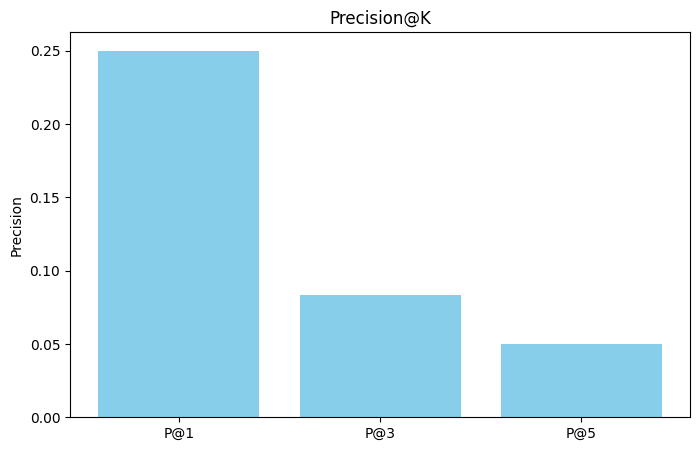

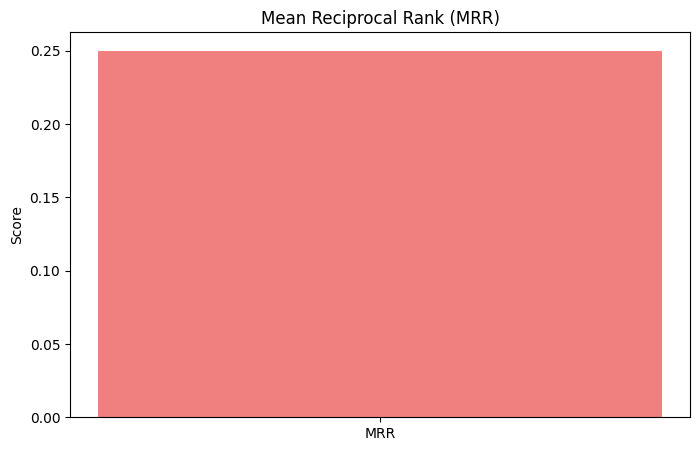

In [43]:
# Function to calculate Precision@K
def calculate_precision_at_k(suggestions, relevant, k):
    """
    Calculates Precision@K for a given set of suggestions against relevant terms.
    - suggestions: List of tuples (term, frequency) as suggestions.
    - relevant: List of relevant terms.
    - k: Integer, number of top suggestions to consider for calculation.
    """
    # Extract just the terms from the top k suggestions for precision calculation
    suggestion_terms = [term for term, _ in suggestions[:k]]
    # Calculate how many of the top-k suggestions are relevant
    relevant_count = sum(1 for term in suggestion_terms if term in relevant)
    # Return the proportion of relevant suggestions
    return relevant_count / k

# Function to calculate Mean Reciprocal Rank (MRR)
def calculate_mrr(suggestions, relevant):
    """
    Calculates the Mean Reciprocal Rank (MRR) based on the suggestions and relevant terms.
    - suggestions: List of tuples (term, frequency) as suggestions.
    - relevant: List of relevant terms.
    """
    # Extract just the terms from suggestions for MRR calculation
    suggestion_terms = [term for term, _ in suggestions]
    # Loop through suggestions to find the first relevant term
    for index, term in enumerate(suggestion_terms, start=1):
        if term in relevant:
            # Return the reciprocal of the rank of the first relevant suggestion
            return 1 / index
    # If no relevant term is found, return 0
    return 0

# Example setup for evaluating the effectiveness of suggestions
evaluation_data = [
    {"query": "harry", "relevant": ["potter", "ron", "hogwarts"]},
    {"query": "dumbledore", "relevant": ["headmaster", "phoenix", "hogwarts"]},
    {"query": "voldemort", "relevant": ["dark", "lord", "horcrux"]},
    {"query": "magic", "relevant": ["wand", "spells", "power"]},
]

# Prepare dictionary to hold precision and MRR for different k values
k_values = [1, 3, 5]
results = {"precision_at_k": {k: [] for k in k_values}, "mrr": []}

# Process each evaluation case
for data in evaluation_data:
    query = data["query"]  # Extract the query from the data
    relevant = data["relevant"]  # Extract the list of relevant terms
    # Fetch suggestions using a bigram index (assumed to be defined elsewhere)
    suggestions = suggest_related_terms(query, bigram_index)

    # Calculate Precision@K for different k values
    for k in k_values:
        precision = calculate_precision_at_k(suggestions, relevant, k)
        results["precision_at_k"][k].append(precision)  # Store the precision for each k

    # Calculate Mean Reciprocal Rank
    mrr = calculate_mrr(suggestions, relevant)
    results["mrr"].append(mrr)  # Store the MRR result

# Compute average results for precision at each k and MRR
avg_precision_at_k = {k: sum(results["precision_at_k"][k]) / len(evaluation_data) for k in k_values}
avg_mrr = sum(results["mrr"]) / len(evaluation_data)

# Output the calculated averages
print("\nEvaluation Results:")
for k in k_values:
    print(f"Precision@{k}: {avg_precision_at_k[k]:.4f}")
print(f"Mean Reciprocal Rank (MRR): {avg_mrr:.4f}")

# Plotting the results for Precision@K
plt.figure(figsize=(8, 5))
plt.bar([f"P@{k}" for k in k_values], [avg_precision_at_k[k] for k in k_values], color="skyblue")
plt.title("Precision@K")
plt.ylabel("Precision")
plt.show()

# Plotting the results for Mean Reciprocal Rank (MRR)
plt.figure(figsize=(8, 5))
plt.bar(["MRR"], [avg_mrr], color="lightcoral")
plt.title("Mean Reciprocal Rank (MRR)")
plt.ylabel("Score")
plt.show()


# Precision@K Chart<br>

What is Precision@K?<br>
- Precision@K measures the proportion of relevant suggestions in the top K suggestions.<br>

- Precision@K = Relevant Suggestions in Top K / 𝐾 <br>

 - For example, if 3 out of the top 5 suggestions are relevant, Precision@5 = 3/5=0.6 <br>

Observations from the Chart:<br>
- Precision@1 (P@1): Approximately 0.25 (25% of the top-1 suggestions are relevant).<br>
- Precision@3 (P@3): Approximately 0.083 (8.33% of the top-3 suggestions are relevant).<br>
- Precision@5 (P@5): Approximately 0.05 (5% of the top-5 suggestions are relevant).<br>

Interpretation:<br>
- The system performs better at Precision@1 (first suggestion is relevant more often) but struggles to maintain relevance as more suggestions are included in the top K.

# Mean Reciprocal Rank (MRR) Chart <br>

What is MRR?<br>
- MRR measures how quickly the system ranks a relevant suggestion.<br>
- MRR = 1/𝑁∑(summation from N to i=1) 1 /Rank of First Relevant Suggestion in Query i<br>

- For example:<br>
 - If the first relevant suggestion is at rank 1 for one query, it contributes 1/1 = 1.0<br>
 - If it is at rank 3 for another query, it contributes 1/3 = 0.33<br>

Observations from the Chart:<br>
- MRR is approximately 0.25 (indicating that, on average, the first relevant suggestion appears at rank 4).<br>

Interpretation:<br>
- The system rarely places the first relevant suggestion at the top rank, leading to a lower MRR score.

# Overall Analysis <br>
**Strengths:**<br>
- The system performs decently for P@1, meaning it often suggests a relevant term as the first suggestion.<br>

**Weaknesses:**
- The precision drops significantly for P@3 and P@5, indicating that many irrelevant suggestions are included in the top ranks.<br>
- A low MRR suggests that relevant terms are often buried deeper in the suggestion list.


# Recommendations for Improvement <br>

Improve Bigram Model:<br>
- Enhance the bigram model by incorporating more contextual relationships.<br>
- Include synonyms or semantic similarity in suggestion ranking.<br>

Use Contextual Features:<br>
- Incorporate sentence context or additional features (e.g., part-of-speech tagging).<br>

Filter Suggestions:<br>
- Apply stricter thresholds to exclude low-frequency or noisy bigrams.<br>

Expand Training Data:<br>
- Add more diverse and relevant examples to improve the model's vocabulary.

In [44]:
# Assuming 'suggest_related_terms' outputs [(term, frequency), ...]
def evaluate_bigram_suggestions(evaluation_data, bigram_index):
    results = {"precision": [], "mrr": []}
    k = 5  # Example k value for Precision@K

    for data in evaluation_data:
        query = data["query"]
        relevant_terms = data["relevant"]

        # Get top k suggestions
        suggestions = suggest_related_terms(query, bigram_index)[:k]

        # Extract only the terms from suggestions for comparison
        suggested_terms = [term for term, freq in suggestions]

        # Calculate Precision@K
        precision = sum(1 for term in suggested_terms if term in relevant_terms) / k
        results["precision"].append(precision)

        # Calculate MRR
        mrr = 0
        for i, term in enumerate(suggested_terms, start=1):
            if term in relevant_terms:
                mrr = 1 / i
                break
        results["mrr"].append(mrr)

    # Average the results
    avg_precision = sum(results["precision"]) / len(results["precision"])
    avg_mrr = sum(results["mrr"]) / len(results["mrr"])

    print(f"Average Precision@{k}: {avg_precision:.2f}")
    print(f"Average MRR: {avg_mrr:.2f}")

# Example usage
evaluate_bigram_suggestions(evaluation_data, bigram_index)


Average Precision@5: 0.05
Average MRR: 0.25
